In [ ]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.2 MB/s 


In [ ]:
# Importing Libraries
import cv2
import mediapipe as mp
import pandas as pd
import os
import imutils
import numpy as np
import warnings
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from base64 import b64decode
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
warnings.filterwarnings("ignore")

In [ ]:
# Feature Extraction
tab_features = []
tab_label = []
directory = '/content/drive/MyDrive/Dataset'
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    for file in os.listdir(f):
        drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
        with mp_face_mesh.FaceMesh(static_image_mode=True, min_detection_confidence=0.5) as face_mesh:
            image = cv2.imread(os.path.join(f, file))
            results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks:
            x, y, z, label = [], [], [], []
            for multi_face_landmarks in results.multi_face_landmarks:
                for i in range(468):                                            # Having anchor point as Cupid's Bow
                    x.append(
                        multi_face_landmarks.landmark[i].x - multi_face_landmarks.landmark[0].x)
                    y.append(
                        multi_face_landmarks.landmark[i].y - multi_face_landmarks.landmark[0].y)
                    z.append(
                        multi_face_landmarks.landmark[i].z - multi_face_landmarks.landmark[0].z)
                col = x + y + z
                tab_features.append(col)
                tab_label.append(folder)

In [ ]:
# Dataset Making
df_features = pd.DataFrame(tab_features)
df_label = pd.DataFrame(tab_label)

In [ ]:
# Printing the Dataset
print(df_features)

    0         1         2         3         4         5         6     \
0    0.0 -0.006692 -0.003193 -0.018376 -0.008431 -0.010199 -0.014960   
1    0.0  0.000315  0.001328 -0.005603  0.000601  0.001708  0.005172   
2    0.0 -0.018896 -0.009930 -0.036172 -0.023599 -0.027526 -0.034506   
3    0.0 -0.001414 -0.000822 -0.010098 -0.001786 -0.002156 -0.002820   
4    0.0 -0.021064 -0.010898 -0.040426 -0.026569 -0.031212 -0.039803   
5    0.0  0.001167  0.001556 -0.004703  0.001634  0.002756  0.006105   
6    0.0  0.003193  0.001812 -0.002179  0.004244  0.005430  0.008329   
7    0.0  0.000253  0.001724 -0.001864  0.001147  0.003311  0.009995   
8    0.0 -0.006739 -0.004762 -0.022522 -0.008644 -0.011179 -0.017186   
9    0.0 -0.001284 -0.000790 -0.010282 -0.001532 -0.001831 -0.002342   
10   0.0 -0.002976  0.000700 -0.008120 -0.003291 -0.001898  0.003218   
11   0.0 -0.001229 -0.000764 -0.009193 -0.001496 -0.001900 -0.002669   
12   0.0 -0.001841 -0.001787 -0.013996 -0.002509 -0.003723 -0.00

In [ ]:
# Printing the Labels
print(df_label)

             0
0       Sleepy
1       Sleepy
2       Sleepy
3       Sleepy
4       Sleepy
5       Sleepy
6       Sleepy
7    Attentive
8    Attentive
9    Attentive
10   Attentive
11   Attentive
12   Attentive
13   Attentive
14   Attentive
15  Distracted
16  Distracted
17  Distracted
18  Distracted
19  Distracted
20  Distracted
21  Distracted


In [ ]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
df_label = label_encoder.fit_transform(df_label)

In [ ]:
# Printing the Labels after Label Encoding
print(df_label)

[2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
# Train Test Split
target = df_label
features = df_features
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.15, random_state=10)

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(rf_pred, Y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



## TESTING WITH LIVE PICTURE

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Function Call
original_image = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
img = cv2.imread(original_image)

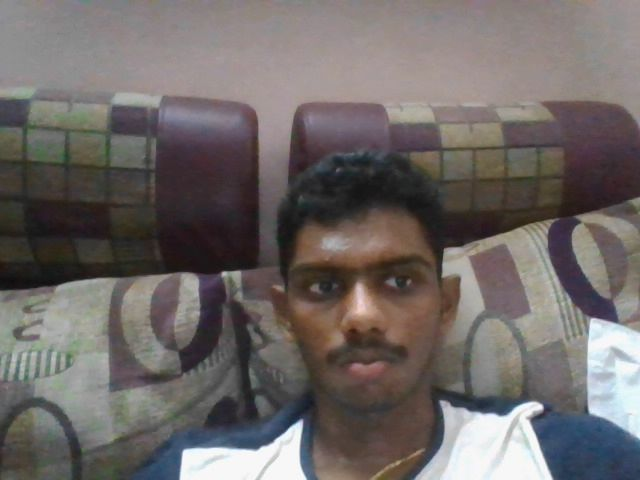

In [ ]:
cv2_imshow(img)

In [ ]:
test_tab_features = []
with mp_face_mesh.FaceMesh(static_image_mode=True, min_detection_confidence=0.5) as face_mesh:
  test_results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  if test_results.multi_face_landmarks:
            x, y, z = [], [], []
            for multi_face_landmarks in results.multi_face_landmarks:
                for i in range(468):
                    x.append(
                        multi_face_landmarks.landmark[i].x - multi_face_landmarks.landmark[0].x)
                    y.append(
                        multi_face_landmarks.landmark[i].y - multi_face_landmarks.landmark[0].y)
                    z.append(
                        multi_face_landmarks.landmark[i].z - multi_face_landmarks.landmark[0].z)
                col = x + y + z
                test_tab_features.append(col)

In [ ]:
rf_pred = rf.predict(test_tab_features)

In [ ]:
tested_emotion = label_encoder.inverse_transform(rf_pred)

In [ ]:
print(tested_emotion[0])

Distracted
